# Autoencoder - Classificação com autoencoder vs sem autoencoder

In [57]:
# Algoritmo Autoencoder - Algoritmo não supervisionado. 
# É um algoritmo self-supervised learning, aprendizagem por si próprio. O que o algoritmo faz é aprender a classificar os
# registros da camada de saida de acordo com os valores da camada de entrada. O algoritmo aprende a codificaar e descodificar
# por si próprio. É como se os registros codificados fossem uma classe.

# Tem uma camada de entrada, uma camada oculta e a camada de saida.
# O nº de neurónios da camada de saida é igual ao da camada de entrada.
# Cada neuronio da camada de entrada está ligado a todos os neurónios da camada oculta(fully connected).
# Cada neurónio da camada oculta está ligado a todos os neurónios da camada de saida(fully connected).

# Da camada de entrada para a camada oculta faz-se uma codificação dos valores da camada de entrada utilizando os pesos.
# Por ex. tem-se na camada de entrada (1 0 1 0 1) faz-se uma codificação e tem-se na camada oculta esses valores codificados
# por exemplo (2 3). Da camada oculta para a camada de saida faz-se a descodificação, utilizando os pesos, e tem-se na camada 
# de saida o valor original da camada de entrada (1 0 1 0 1).

# O processo é parecido às redes neurais classicas feed-forward. Utiliza-se tambem o back-propagation para a actualização dos 
# pesos.
# São atribuidos pesos aos neuronios da rede e os calculos são efectuados com esses pesos partindo da camada de entrada até a 
# camada de saida. 
# Calcula-se o erro obtido na camada de saida e modificam-se os pesos da iteração anterior partindo da camada de saida até a 
# camada de entrada. Utiliza-se o método da descida do gradiente para encontrar o melhor valor para os pesos.
# De seguida, e com os pesos obtidos na iteração anterior, são efectuados os mesmos calculos. Cada actualização dos pesos
# chama-se de epoca.

#----------------------------------------------------------------------------------------------------------------------------
# Exemplo
# Para 4 variaveis de entrada emprego, filhos, casado, carro, tem-se o seguinte registro 0010.

# Codificação (Representação com 2 dimensões da camada de entrada):
# A ligação da camada de entrada a camada oculta faz-se atraves de linhas(como se fossem os pesos). Para exemplificação
# representou-se a linha sólida por +1 e a linha a tracejado por -1. Na prática estes valores são inicializados aleatoriamente,
# como se fossem os pesos.
# A ligação do neurónio emprego ao neuronio 1 da camada oculta faz-se através de uma linha sólida.
# A ligação do neurónio casado ao neuronio 1 da camada oculta faz-se através de uma linha sólida.
# A ligação do neurónio casado ao neuronio 2 da camada oculta faz-se através de uma linha sólida.
# A ligação do neurónio carro ao neuronio 2 da camada oculta faz-se através de uma linha sólida.
# Todas as restantes ligações fazem-se através de linhas tracejadas.
# Para o neurónio 1 da camada oculta tem-se: (0x1)+(0x-1)+(1x1)+(0x-1)=1
# Para o neurónio 2 da camada oculta tem-se; (0x-1)+(0x-1)+(1x1)+(0x1)=1

# Descodificação:
# A ligação da camada de oculta faz-se atraves de linhas(como se fossem os pesos). Para exemplificação
# representou-se a linha sólida por +1 e a linha a tracejado por -1. Na prática estes valores são inicializados aleatoriamente,
# como se fossem os pesos.
# A ligação do neurónio 1 ao neurónio 1 da camada de saida (emprego) faz-se através de 1 linha sólida.
# A ligação do neurónio 1 ao neurónio 3 da camada de saida (casado) faz-se através de 1 linha sólida.
# A ligação do neurónio 2 ao neurónio 2 da camada de saida (filhos) faz-se através de 1 linha sólida.
# A ligação do neurónio 2 ao neurónio 3 da camada de saida (casado) faz-se através de 1 linha sólida.
# Para o neurónio 1 da camada de saida(emprego) tem-se: (1x1)+(1x-1) = 0
# Para o neurónio 2 da camada de saida(filhos) tem-se: (1x-1)+(1x1) = 0
# Para o neurónio 3 da camada de saida(casado) tem-se: (1x1)+(1x1) = 2
# Para o neurónio 4 da camada de saida(carro) tem-se: (1x-1)+(1x-1) = -2
# Aplicação de uma função de activação, que pode ser a função softmax (que transforma todos os valores menores ou iguais a zero
# em zero e os valores maiores a zero em um).
# Para o neurónio 1 da camada de saida(emprego) tem-se: (1x1)+(1x-1) = 0 -> 0
# Para o neurónio 2 da camada de saida(filhos) tem-se: (1x-1)+(1x1) = 0 -> 0
# Para o neurónio 3 da camada de saida(casado) tem-se: (1x1)+(1x1) = 2 -> 1
# Para o neurónio 4 da camada de saida(carro) tem-se: (1x-1)+(1x-1) = -2 -> 0

# Neste caso na primeira iteração já se obteve os mesmos valores na camada de saida e de entrada. O que significa que o registro
# de 4 dimensões 0010 pode ser representado por um registro de 2 dimensões 11, que foi o valor obtido na camada oculta.
#------------------------------------------------------------------------------------------------------------------------------
# Outro tipo de Autoencoders.
# Em vez de utilizar o autoencoder para reduzir a dimensionalidade, o autoencoder pode ser utilizado para aumentar a
# dimensionalidade. Isto pode ser feito colocando mais neuronios na camada oculta do que na camada de entrada. Pode ser feito
# para se ter mais atributos na base de dados, ter uma representação mais detalhada dos dados. 
# Um dos problemas que pode acontecer é que durante a codificação os valores da camada de entrada podem ser simplesmente 
# copiados para a camada oculta.
# Para solucionar este problema foram criados os seguintes autoencoders 

# Sparce autoencoder:
# Este autoencoder utiliza uma tecnica de regularização para prevenir o overfiting.
# Não utiliza todos os neurónios da camada oculta(coloca valores pequenos nos pesos). O sparce autoencoder a cada epoca não 
# considera alguns neuronios aleatorios da camada oculta. Por exemplo durante o treino, na primeira época não considera o 
# neuronio 1 da camada oculta. Na segunda época não considera o neuronio 1 e neuronio 4 da camada oculta.

# Denoising autoencoder:
# Todas as camadas têm o mesmo número de neurónios.
# Modifica os valores da camadd de entrada , alterando alguns neurónios aleatoriamente para o valor zero durante o treino para
# evitar o overfitting. Ou seja a cada epoca não considera alguns neuronios aleatorios da camada de entrada.
# Quando os pesos são actualizados, a camada de saida é comparada com os valores originais para se obter o valor do erro.

# Contractive autoencoder
# Adiciona uma função de custo quando os pesos são actualizados. Funciona da mesma forma do que os autoencoders tradicionais, 
# apenas durante o processo de back-propagation para o calculo dos pesos é adicionada uma função custo à função do calculo do
# erro. Isto faz com que o modelo se adpte melhor aos dados.

# Deep autoencoder(stack autoencoder)
# Por exemplo se predende-se reduzir a dimensionalidade de 5 para 2.
# Na codificação:
# Tem-se a camada de entrada com 5 neurónios
# Tem-se de seguida uma camada oculta com 4 neurónios.
# Tem-se de seguida uma camada oculta com 3 neurónios.
# Tem-se de seguida uma camada oculta com 2 neurónios. A camada com a redução da dimensionalidade pretendida.
# Na descodificação:
# Tem-se de seguida uma camada oculta com 3 neurónios.
# Tem-se de seguida uma camada oculta com 4 neurónios.
# Tem-se a camada de saida com 5 neurónios.

# Convolution autoencoder
# Por exemplo tem-se uma imagem do seguinte tamanho 28x28.
# Na codificação:
# Camada de entrada: 28x28x1 (1 porque é uma figura)
# Camada de convolução(e pooling): 14x14x32 (matriz de pooling obtida por 32 detectores de caracteristicas).
# Camada de convolução(e pooling): 7x7x64
# Camada de convolução(e pooling): 3x3x128
# Camada de flatter: 1152 (3x3x128)
# Camada oculta com 10 neurónios. A camada com a redução da dimensionalidade pretendida (neste caso 10 neurónios).
# Na descodificação:
# Camada de flatter: 1152 (3x3x128)
# Camada de convolução(e pooling): 3x3x128
# Camada de convolução(e pooling): 7x7x64
# Camada de convolução(e pooling): 14x14x32
# Camada de saida: 28x28x1

In [58]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import models, layers, datasets, utils, preprocessing

%matplotlib inline

## Obter os dados

In [59]:
# A base de dados já está dividida em dois conjuntos: treino e teste
(X_train, y_train), (X_test,y_test) = datasets.mnist.load_data()

In [60]:
# 60000 imagens para treino
len(X_train)

60000

In [61]:
# 10000 imagens para teste
len(X_test)

10000

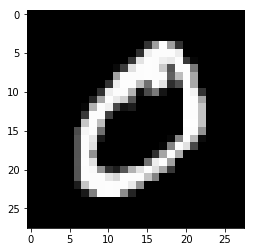

In [62]:
# Número zero a preto e branco
plt.imshow(X_train[1], cmap="gray")

In [63]:
# Matriz com os pixeis da imagem com o número zero.
# Matriz 28x28 (784 pixeis).
pixeis = X_train[1]
pixeis.shape

(28, 28)

# Pré-Processamento dos dados

In [64]:
# 60000 imagens para treino
X_train.shape[0]

60000

### Transformar os dados num vector em que o tensorflow consiga fazer a sua leitura.

In [65]:
# Para redes neurais convolucionais:
# 1º parametro: número de imagens
# 2º parametro: Altura da imagem (nº de pixeis da imagem na vertical).
# 3º parametro: Largura da imagem (nº de pixeis da imagem na horizontal).

# Nº de canais de RGB: Como a cor não tem influência neste caso pode-se utilizar a imagem a preto e branco(rgb=1). Quando se 
# utilizam as imagens a cores (rgb=3) o algoritmo fica mais lento porque aumenta a dimensionalidade dos dados. Uma imagem a 
# cores tem 3 canais(valores) dentro de cada pixel, porque o pixel é subdividio em vermelho(r), verde(g e azul(b)). Com rgb=1 
# tem-se menos dados para processar.

# A escala de cinzento possui apenas um canal. Quanto mais próximo de 255 mais claro é o cinzento e quanto mais próximo de 
# 0 mais escura é a cor.
# Nesta escala o Pixel com o valor 255 é o branco e pixel 0 é o preto. Ao redor do número tem-se apenas o valor 0, que indica o 
# preto(o fundo é preto).

#X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) # (60000, 28, 28, 1)
#X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
#-------------------------------------------------------------------------------------------------------------------
# Para redes neurais artificiais:
# 1º parametro: número de imagens.
# 2º parametro: quantidade de pixeis por imagem. Neste caso tem-se 28x28=784 pixeis.

X_train = X_train.reshape((len(X_train), np.prod(X_test.shape[1:]))) # (60000, 784)
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [66]:
X_train.shape

(60000, 784)

### Conversão dos dados do tipo int8 para float32

In [67]:
# Como os dados vão ser convertidos para uma escala entre 0 e 1 tem-se de converter os dados de inteiro8 para float32 para que
# os valores obtidos depois da normalização não sejam inteiros e consequentemente quase todos 0(por não haver números decimais).

#X_test[0,1,1]
type(X_test[0,1])

numpy.uint8

In [68]:
# Conversão dos dados em float 32
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [69]:
type(X_test[0,1])

numpy.float32

### Normalização dos pixeis

In [70]:
# passar os pixeis para uma escala de 0 a 1 para que o precessamento dos dados seja mais rapido
# Isto pode ser feito através da tecnica min max normalization. Como cada pixel ocupa 1 byte e o byte consegue guardar 256
# resultados possiveis(ou seja varia entre 0 e 255). 
# A normalização pode ser feita dividindo o pixel por 255 (tambem se podia utilizar o skit-learn).

# Pode-se ver que o valor máximo de um pixel é de 255
X_test[0].max()

255.0

In [71]:
X_test[0].min()

0.0

In [72]:
# Normalização do conjunto de teste e treino
X_train = X_train/255
X_test = X_test/255

In [73]:
X_test[0].max()

1.0

### Transformação de variaveis em dummys

In [74]:
# Como se trata de um problema de multiplas classes, cada classe tem de ter a probabilidade de pertencer a um número, ou seja
# tem de ser um vector [60000,10] e [10000,10] (exigencia da biblioteca) e não se pode utilizar o LabelEncoder.

# número 1: 1 0 0 0 0 0 0 0 0 0
# número 2: 0 1 0 0 0 0 0 0 0 0
# ....
# número 0: 0 0 0 0 0 0 0 0 0 1

# tambem se podia utilizar o pd.get_dummies()
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [75]:
y_train.shape

(60000, 10)

## Modelo Autoencoder

In [76]:
# factor de compactação = 784/32 = 24.5.Vai-se compactar a imagem 24.5 vezes em relação à original.

# Sequential - A informação move-se da camada de entrada, para a camada oculta e de seguida para a camada de saida.

#Dense - Camadas densas(cada um dos neurónios é ligado com todos os neuronios da camada seguinte) tambem chamada de rede neural
# fully connected

# 1ª Camada Oculta(e definição da camada de entrada) 
# units: Número de neuronios da 1ª camada oculta. Definir qual a redução de dimensionalidade que se quer. Neste caso pretende-se
# passar de 784 variaveis de entrada para 32.
# Função de Activação: Normalmente escolhe-se a reLu para deep learning porque obtem-se melhores resultados do que com uma
# função sigmoide ou tangente hiperbolica. 
# Kernel initializer: Como se inicializam os pesos.
# input_dim: quantos atributos existem na camada de entrada (neste caso são 784 variaveis de entrada). Este parâmetro só é 
# necessário para a primeira camada oculta. Com este parâmetro activo não é necessário colocar explicitamente a camada de 
# entrada porque na 1ª camada oculta está-se a dizer o numero de neurónios da camada de entrada.

# Camada de Saida
# units: Número de neurónios da camada de saida. Igual ao número de neurónios da camada de entrada.
# Função de activação: Sigmoid porque é um problema de classificação binário que varia entre 0 e 1, e esta função retorna sempre
# um valor entre 0 e 1. Pode-se utilizar a sigmoid porque foi feita a normalização dos pixeis entre 0 e 1. Tambem se utiliza
# bastantes vezes a função sigmoid.

model = models.Sequential()
model.add(layers.Dense(units=32, activation="relu", input_dim=784)) # Camada oculta e difinição da camada de entrada (codificação da camada de entrada: redução da dimensionalidade).
model.add(layers.Dense(units=784, activation="sigmoid")) # Camada de Saida(descodificação da camada oculta).


In [77]:
# 784x32+32(bies na camada oculta)=25120 parâmetros(pesos)
# 32x784+784(bies na camada de entrada)=25872 parâmetros
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


### Compilação e Ajuste do modelo autoencoder

In [78]:
# Optimizer: adam é uma optimização da descida do gradiente estócastico (usado para encontrar os melhores valores dos pesos).
# É o que melhor se adapta à maioria dos casos.
# loss = função de perda binary_crossentropy é a mais utilizada para classificação binária. Mede o quão afastada está a previsão
# do seu valor real(0 ou 1) para cada classe e faz a média desses erros(desvios) para obter o custo(loss). Como utiliza o
# logaritmo tem uma penalização maior quando existe uma classificação errada.

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["binary_accuracy"])

In [80]:
# batch_size
# batch_size: 256, calcula-se o erro de um conjunto de 256 dados e actualizam-se os pesos. Quanto mais alto este valor, mais
# rapido são executados os calculos.

# epochs: Quantas vezes(iterações) se ajustam os valores dos pesos para cada conjunto de dados(batch). Ou seja quantas vezes se
# faz o treino dos dados com os valores dos pesos a serem melhorados.

# 1ª epoca- calcula o erro para os primeiros 256 dados e actualiza os pesos. calcula o o erro para os 256 dados seguintes e
# actualiza os pesos. E assim sucessivamente.
# 2ª epoca- calcula o erro para os primeiros 256 dados(com os pesos da 1ª epoca) e actualiza os pesos. calcula o erro para 
# os 256 dados seguintes(com os pesos da 1ª epoca) e actualiza os pesos. E assim sucessivamente.

# Validation data: Avaliação do modelo utilizando a base de dados de teste (val_accuracy).

# Em vez do y_train utiliza-se o X_train em seu lugar. 
# Está-se a fazer a codificação da camada de entrada no nº de neurónios da camada oculta.
# De seguida faz-se a descodificação da camada oculta na camada de saida.
# De seguida compara-se a camada de saida com a camada de entrada(e não com o y_train).
# Calcula-se o erro e ajustam-se os pesos utilizando a tecnica back-propagation.
# Repetem-se os passos anteriores para o número de épocas definido.

# Ajustar os dados de entrada de treino aos dados de saida de treino para treinar o modelo
model.fit(X_train, X_train, batch_size=256, epochs=50, validation_data=(X_test,X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1417 - binary_accuracy: 0.8076 - val_loss: 0.1314 - val_binary_accuracy: 0.8084
Epoch 2/50
60000/60000 [==============================] - 3s 58us/sample - loss: 0.1266 - binary_accuracy: 0.8100 - val_loss: 0.1194 - val_binary_accuracy: 0.8101
Epoch 3/50
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1165 - binary_accuracy: 0.8115 - val_loss: 0.1111 - val_binary_accuracy: 0.8114
Epoch 4/50
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1093 - binary_accuracy: 0.8125 - val_loss: 0.1052 - val_binary_accuracy: 0.8120
Epoch 5/50
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1043 - binary_accuracy: 0.8131 - val_loss: 0.1010 - val_binary_accuracy: 0.8124
Epoch 6/50
60000/60000 [==============================] - 3s 58us/sample - loss: 0.1008 - binary_accuracy: 0.8135 - val_loss: 0.0981 - 

## Modelo Autoencoder para redução da dimensionalidade

In [81]:
# original size: Camada de entrada com as dimensões originais da imagem.
# encoded size: Camada com a redução da dimensionalidade aplicada através da codificação(camada zero do modelo do autoencoder).

original_size = layers.Input(shape=784,) # Camada de entrada.
encoded_size = layers.Dense(units=32, activation="relu", input_dim=784)
#encoded_size = model.layers[0] # Camada oculta(codificação da camada de entrada: redução da dimensionalidade).

In [82]:
# Com o modelo de autoencoder model fez-se a codificação e descodificação. Ou seja reduziu-se a dimensionalidade das imagens e
# depois voltou a transformar-se as imagens na dimensão original.
# Com o modelo encoder apenas se faz a codificação. Ou seja apenas se reduz a dimensionalidade das imagens.

# Modelo para fazer a redução de dimensionalidade.

# Model utiliza-se quando se quer criar manualmente a rede neural.
# O modelo encoder recebe o original size e transforma no encoded_size.

# Model(camada de entrada, estrutura da rede).
# estrutura da rede: a camada encoded_size segue-se à camada original_size.
encoder = models.Model(original_size, encoded_size(original_size))

In [83]:
# Transforma de 784 dimensões para 32 dimensões.
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [84]:
# Vai-se utilizar o X_train_codificado(imagens com redução de dimensionalidade) para treinar um modelo de rede neural e 
# comparar com resultados obtidos utilizando o X_train(imagens originais).

# Imagens de teste codificadas(com redução de dimensionalidade de 784 para 32).
X_train_codificado = encoder.predict(X_train)
X_train_codificado[0].shape

(32,)

In [85]:
# Vai-se utilizar o X_test_codificado(imagens com redução de dimensionalidade) para avaliar o um modelo de rede neural treinado
# utilizando o X_train_codificado e comparar com resultados obtidos utilizando o X_test(imagens originais).

# Imagens de teste codificadas(com redução de dimensionalidade de 784 para 32).
X_test_codificado = encoder.predict(X_test)
X_test_codificado[0].shape

(32,)

## Modelo de rede neural artificial sem redução de dimensionalidade

In [86]:
# sequential - uma cada apos a outra
# dense - camadas fully conected, cada neuronio esta conectado a todos os neuronios da camada seguinte

# 1ª Camada Oculta(e definição da camada de entrada) 
# Neuronios: normalmente escolhe-se o número de neuronios igual ao número de variaveis de entrada mais o número de variaveis de 
# saida divididos por 2 ((784+10)/2=397) para começar a modelar a rede. 
# Função de Activação: Normalmente escolhe-se a reLu para deep learning porque obtem-se melhores resultados do que com uma
# função sigmoide ou tangente hiperbolica. 
# input_dim: quantos atributos existem na camada de entrada (neste caso são 784 variaveis de entrada). Este parâmetro só é 
# necessário para a primeira camada oculta.

# 2ª Camada Oculta
# Na segunda camada oculta em geral coloca-se a mesma quantidade de neurónios do que na primeira.

# Camada de Saida
# Neuronios: Igual ao número de saidas possiveis, neste caso são 3 classes.
# Função de activação: softmax é a função utilizada para problemas de classificação multiclasse. Para se obter a probabilidade
# para cada uma das classes (por ex. para um neurónio tem-se a probabilidade de 10% de ser nº1, 80% nº2 e 10% de ser nº3. 
# A classe atribuida será aquela que tem maior probabilidade, neste ex. a iris verginica).

model_non_reduced = models.Sequential()
model_non_reduced.add(layers.Dense(units=397, activation="relu", input_dim=784))
model_non_reduced.add(layers.Dense(units=397, activation="relu"))
model_non_reduced.add(layers.Dense(units=10, activation="softmax"))

## Compilação e Ajuste do modelo ANN sem redução de dimensionalidade

In [87]:
# Optimizer: adam é uma optimização da descida do gradiente estócastico (usado para encontrar os melhores valores dos pesos).
# É o que melhor se adapta à maioria dos casos.

# loss = função de perda categorical_crossentropy é a mais utilizada para classificação multiclasse.

model_non_reduced.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [91]:
# batch_size
# batch_size: 256, calcula-se o erro de um conjunto de 256 dados e actualizam-se os pesos. Quanto mais alto este valor, mais
# rapido são executados os calculos.

# epochs: Quantas vezes(iterações) se ajustam os valores dos pesos para cada conjunto de dados(batch). Ou seja quantas vezes se
# faz o treino dos dados com os valores dos pesos a serem melhorados.

# 1ª epoca- calcula o erro para os primeiros 256 dados e actualiza os pesos. calcula o o erro para os 256 dados seguintes e
# actualiza os pesos. E assim sucessivamente.
# 2ª epoca- calcula o erro para os primeiros 256 dados(com os pesos da 1ª epoca) e actualiza os pesos. calcula o erro para 
# os 256 dados seguintes(com os pesos da 1ª epoca) e actualiza os pesos. E assim sucessivamente.

# Validation data: Avaliação do modelo utilizando a base de dados de teste (val_accuracy).

# Ajustar os dados de entrada de treino aos dados de saida de treino para treinar o modelo
model_non_reduced.fit(X_train, y_train, batch_size=256, epochs=50, validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0022 - categorical_accuracy: 0.9995 - val_loss: 0.0862 - val_categorical_accuracy: 0.9845
Epoch 2/50
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0016 - categorical_accuracy: 0.9997 - val_loss: 0.0892 - val_categorical_accuracy: 0.9847egorical_accu
Epoch 3/50
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0012 - categorical_accuracy: 0.9998 - val_loss: 0.0898 - val_categorical_accuracy: 0.9846
Epoch 4/50
60000/60000 [==============================] - 4s 72us/sample - loss: 8.6610e-04 - categorical_accuracy: 0.9999 - val_loss: 0.0921 - val_categorical_accuracy: 0.9850
Epoch 5/50
60000/60000 [==============================] - 4s 70us/sample - loss: 7.0428e-04 - categorical_accuracy: 0.9999 - val_loss: 0.0933 - val_categorical_accuracy: 0.9851
Epoch 6/50
60000/60000 [==============================] - 4s 72u

Epoch 47/50
60000/60000 [==============================] - 4s 68us/sample - loss: 2.6918e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1213 - val_categorical_accuracy: 0.9865
Epoch 48/50
60000/60000 [==============================] - 4s 63us/sample - loss: 2.6913e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1220 - val_categorical_accuracy: 0.9864
Epoch 49/50
60000/60000 [==============================] - 4s 68us/sample - loss: 2.6909e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1225 - val_categorical_accuracy: 0.9865
Epoch 50/50
60000/60000 [==============================] - 4s 68us/sample - loss: 2.6905e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1231 - val_categorical_accuracy: 0.9864


## Modelo de rede neural artificial com redução de dimensionalidade

In [92]:
# Modelo de rede neural artificial 

# 1ª Camada Oculta(e definição da camada de entrada) 
# Neuronios: normalmente escolhe-se o número de neuronios igual ao número de variaveis de entrada mais o número de variaveis de 
# saida divididos por 2 ((32+10)/2=21) para começar a modelar a rede. 
# Função de Activação: Normalmente escolhe-se a reLu para deep learning porque obtem-se melhores resultados do que com uma
# função sigmoide ou tangente hiperbolica. 
# input_dim: quantos atributos existem na camada de entrada (neste caso são 32 variaveis de entrada). Este parâmetro só é 
# necessário para a primeira camada oculta.

model_reduced = models.Sequential()
model_reduced.add(layers.Dense(units=21, activation="relu", input_dim=32))
model_reduced.add(layers.Dense(units=21, activation="relu"))
model_reduced.add(layers.Dense(units=10, activation="softmax"))

## Compilação e Ajuste do modelo ANN com redução de dimensionalidade

In [93]:
# Compilação do modelo
model_reduced.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [95]:
# Ajustar os dados de entrada de treino codificados aos dados de saida de treino codificados para treinar o modelo
model_reduced.fit(X_train_codificado, y_train, batch_size=256, epochs=50, validation_data=(X_test_codificado,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 9us/sample - loss: 0.7446 - categorical_accuracy: 0.7574 - val_loss: 0.7167 - val_categorical_accuracy: 0.7652
Epoch 2/50
60000/60000 [==============================] - 1s 9us/sample - loss: 0.7411 - categorical_accuracy: 0.7588 - val_loss: 0.7125 - val_categorical_accuracy: 0.7627
Epoch 3/50
60000/60000 [==============================] - 1s 9us/sample - loss: 0.7380 - categorical_accuracy: 0.7599 - val_loss: 0.7083 - val_categorical_accuracy: 0.7648
Epoch 4/50
60000/60000 [==============================] - 1s 9us/sample - loss: 0.7350 - categorical_accuracy: 0.7604 - val_loss: 0.7062 - val_categorical_accuracy: 0.7668
Epoch 5/50
60000/60000 [==============================] - 1s 9us/sample - loss: 0.7309 - categorical_accuracy: 0.7625 - val_loss: 0.7010 - val_categorical_accuracy: 0.7678
Epoch 6/50
60000/60000 [==============================] - 1s 9us/sample - loss: 0.7285 - c

Epoch 48/50
60000/60000 [==============================] - 1s 10us/sample - loss: 0.6582 - categorical_accuracy: 0.7845 - val_loss: 0.6449 - val_categorical_accuracy: 0.7853
Epoch 49/50
60000/60000 [==============================] - 1s 9us/sample - loss: 0.6582 - categorical_accuracy: 0.7848 - val_loss: 0.6400 - val_categorical_accuracy: 0.7847
Epoch 50/50
60000/60000 [==============================] - 1s 9us/sample - loss: 0.6566 - categorical_accuracy: 0.7851 - val_loss: 0.6410 - val_categorical_accuracy: 0.7872
